In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
weather_df = pd.read_csv("./csv_files/weather.csv")

In [6]:
weather_df.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


### Let's write some description
* tmax : maximum temperature
* tmin : min temperature
* tavg : average temperature
* depart : temperature departure from normal
* dewpoint : The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity (RH) of 100%. At this point the air cannot hold more water in the gas form.
* wetbulb : Wet bulb temperature is the lowest temperature to which air can be cooled by the evaporation of water into the air at a constant pressure. It is therefore measured by wrapping a wet wick around the bulb of a thermometer and the measured temperature corresponds to the wet bulb temperature.
* heat : 
* cool :
* sunrise : time at which the sunrise happens
* sunset : time at which the sunset happens
* codesum : weather type RA is rainy, FZ is Freezing, FG is Fog, BR is MIST
* snowfall : snowfall in inches (M : missing data, T : trace data)
* preciptotal : total precipitation
* stnpressure : average station pressure 
* sealevel : average sealevel pressure
* resultspeed : resultant wind speed in mph 
* resultdir : resultant wind direction in 10's of degrees
* avgspeed : average wind speed

### Columns, their values and number of values

In [61]:
for col in weather_df.columns:
    print("*"*30,col,"*"*30)
    print(weather_df[col].unique())
    print("Number of values : ",weather_df[col].nunique())

****************************** station_nbr ******************************
[ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20  5]
Number of values :  20
****************************** date ******************************
['2012-01-01' '2012-01-02' '2012-01-03' ... '2014-10-29' '2014-10-30'
 '2014-10-31']
Number of values :  1035
****************************** tmax ******************************
['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45'
 '60' '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26'
 '71' '58' '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75'
 '33' '51' '57' '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14'
 '22' '13' '10' '20' '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82'
 '83' '88' '87' '92' '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' 'M'
 '97' '98' '101' '99' '100' '105' '103' '102' '106' '104' '109' '107'
 '108' '110' '111' '112' '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1'
 '6' '2' '3' '7' '-2

In [8]:
weather_df.dtypes

station_nbr     int64
date           object
tmax           object
tmin           object
tavg           object
depart         object
dewpoint       object
wetbulb        object
heat           object
cool           object
sunrise        object
sunset         object
codesum        object
snowfall       object
preciptotal    object
stnpressure    object
sealevel       object
resultspeed    object
resultdir      object
avgspeed       object
dtype: object

In [9]:
datetime_columns = ['date','sunrise','sunset']
categorical_columns = ['station_nbr','codesum']
numerical_columns = [col for col in weather_df.columns if ((col not in categorical_columns) and (col not in datetime_columns))]
datatypes = weather_df.dtypes.to_dict()
for column in numerical_columns:
    datatypes[column] = 'float'
for column in categorical_columns:
    datatypes[column] = 'object'
dtp = OrderedDict()
for (k, v) in datatypes.items():
    dtp[k] = str(v)

print("Column datatypes : ",dtp)

Column datatypes :  OrderedDict([('station_nbr', 'object'), ('date', 'object'), ('tmax', 'float'), ('tmin', 'float'), ('tavg', 'float'), ('depart', 'float'), ('dewpoint', 'float'), ('wetbulb', 'float'), ('heat', 'float'), ('cool', 'float'), ('sunrise', 'object'), ('sunset', 'object'), ('codesum', 'object'), ('snowfall', 'float'), ('preciptotal', 'float'), ('stnpressure', 'float'), ('sealevel', 'float'), ('resultspeed', 'float'), ('resultdir', 'float'), ('avgspeed', 'float')])


In [10]:
## replace M's with 0's
weather_df.replace('M','0',inplace=True)
weather_df.replace('  T','0',inplace=True)

In [11]:
##Changing the datatype of columns
weather_df=weather_df.astype(dtp)

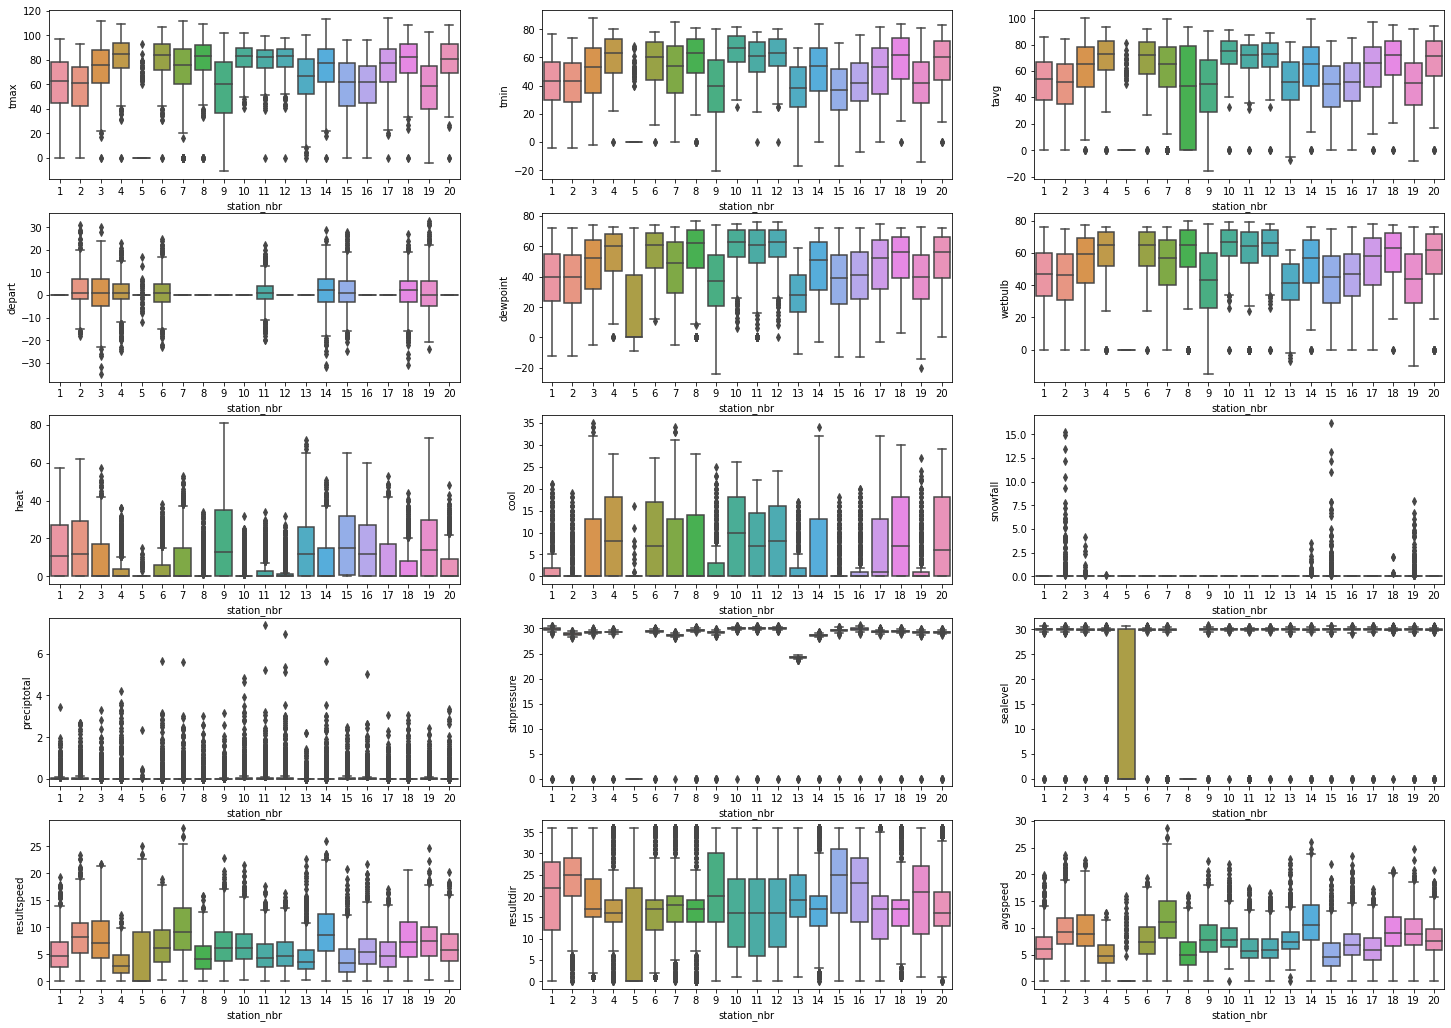

In [12]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(nrows = 5,ncols = 3,figsize=(25,18))
num_col_index = 0
for ax in fig.get_axes():
    sns.boxplot(x='station_nbr',y=numerical_columns[num_col_index],data=weather_df,ax=ax)
    num_col_index += 1

* This plots show different nature for each weather condition.
* This will be further used for feature extraction

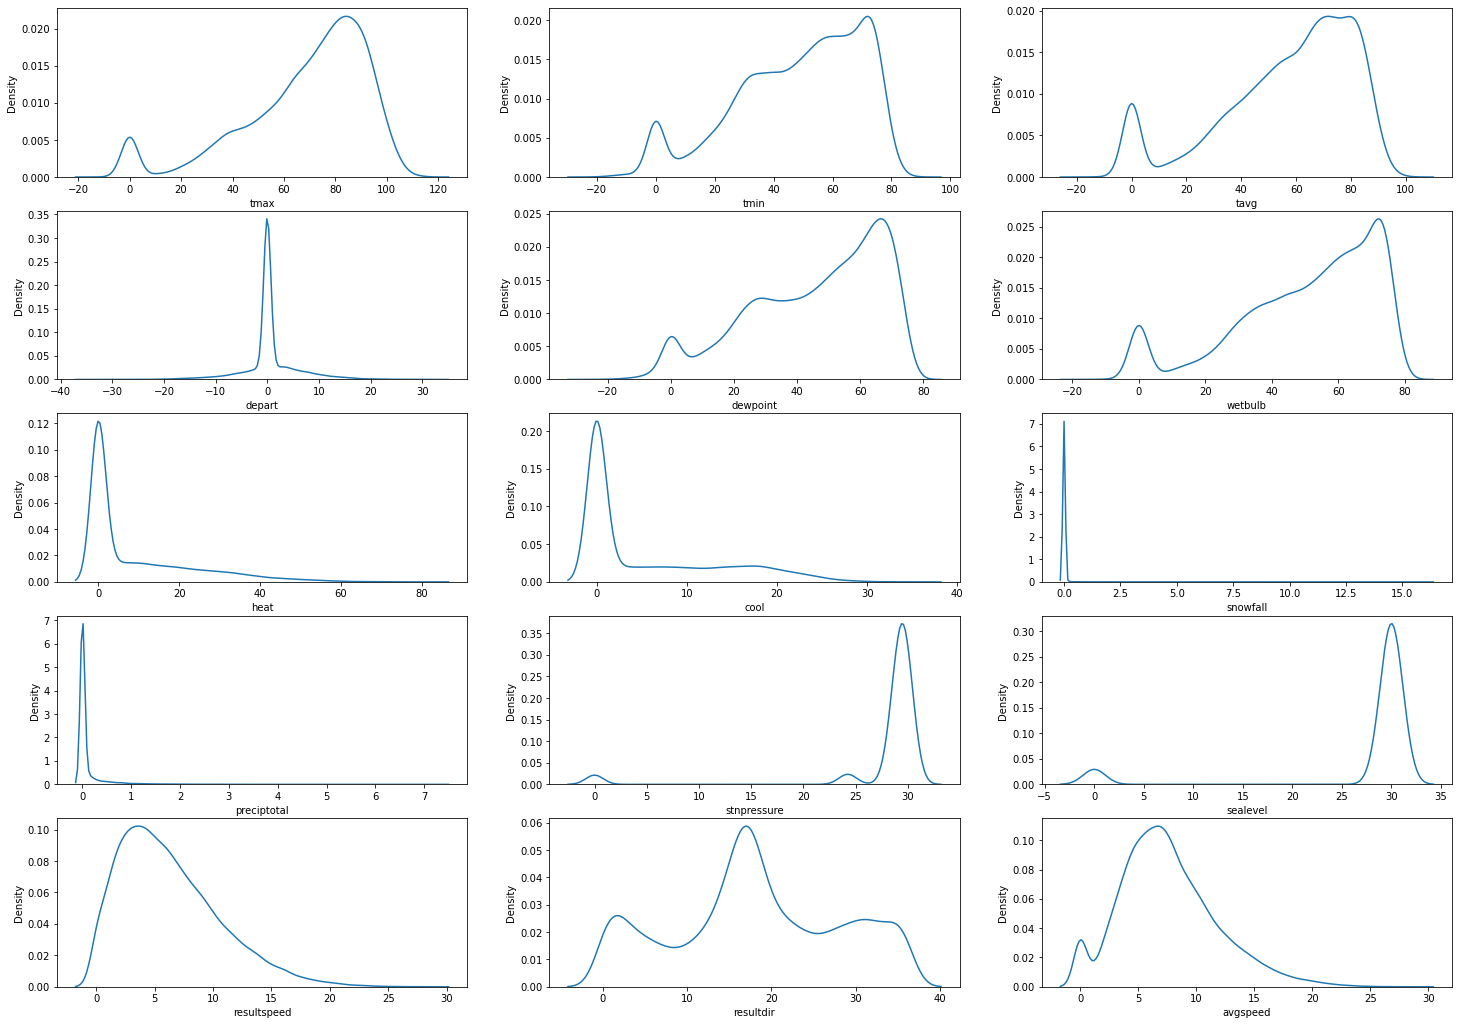

In [13]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(nrows = 5,ncols = 3,figsize=(25,18))
num_col_index = 0
for ax in fig.get_axes():
    sns.kdeplot(weather_df[numerical_columns[num_col_index]],ax=ax)
    num_col_index += 1